In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import Dense
import numpy as np

df = pd.read_csv(r'C:\Users\pinkpigma\pinkpigma的同步盘\KDD研二上\可解释性框架-工作\数据\patient_diagnoses2000_ndc300_with_history_delete2.csv')

In [2]:
# 预测第一天用药
x = df.iloc[:,5:5+72+2000]
y = df.iloc[:,5+72+2000:5+72+2000+300]

In [4]:
y

,00338001702_first,00338004904_first,00338004903_first,00409672924_first,00517570425_first,51079025520_first,00338004902_first,00338070341_first,00338355248_first,00338004938_first,...,00064065001_first,60505251903_first,00009338901_first,51079075920_first,00338001701_first,51079000620_first,00310013039_first,00007313705_first,00172439018_first,63481062375_first
0,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31109,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31110,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31111,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.impute import SimpleImputer

from sklearn. preprocessing import LabelEncoder 
x['gender'] = LabelEncoder().fit_transform(x['gender'])
x['ethnicity'] = LabelEncoder().fit_transform(x['ethnicity'])
x['ethnicity_grouped'] = LabelEncoder().fit_transform(x['ethnicity_grouped'])
x['first_hosp_stay'] = LabelEncoder().fit_transform(x['first_hosp_stay'])

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

x = imp.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
from keras import backend as K
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)





In [6]:
from keras import backend as K
from keras import losses
import numpy as np
import tensorflow as tf
from keras import losses
def JI(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
#     K.print_tensor(y_true, message='y_true = ')

    threshold_value = 0.3

    y_pred = K.cast(K.greater(y_pred, threshold_value), K.floatx())
#     K.print_tensor(y_pred, message='y_pred = ')
    fenzi = K.sum(y_true * y_pred, keepdims=True)
    # true_positives_sum = K.sum(true_positives, keepdims=True)
    fenmu = K.sum(K.cast((K.greater(y_true + y_pred, 0.8)), K.floatx()), keepdims=True)

    return K.mean(fenzi / fenmu, axis=-1)



def deep_model(feature_dim,label_dim, layer_num=1):
    from keras.models import Sequential
    from keras.layers import Dense
    model = Sequential()
    print("create model. feature_dim ={}, label_dim ={}".format(feature_dim, label_dim))
    model.add(Dense(512, activation='relu', input_dim=feature_dim))
    
    for i in range(layer_num):
        model.add(Dense(512, activation='relu'))
    model.add(Dense(label_dim, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[JI])
    return model

import keras
callbacks_list = [
    # This callback will interrupt training when we have stopped improving
     keras.callbacks.EarlyStopping(
    # This callback will monitor the validation accuracy of the model
    monitor='val_loss',
     # Training will be interrupted when the accuracy
     # has stopped improving for *more* than 1 epochs (i.e. 2 epochs)
     patience=20,
    )
#     keras.callbacks.ReduceLROnPlateau(
#      # This callback will monitor the validation loss of the model
#      monitor='val_loss',
#      # It will divide the learning by 10 when it gets triggered
#      factor=0.1,
#      # It will get triggered after the validation loss has stopped improving
#      # for at least 10 epochs
#      patience=10,
#     ),
    # This callback will save the current weights after every epoch
#     keras.callbacks.ModelCheckpoint(
#      filepath=r'C:\Users\pinkpigma\pinkpigma的同步盘\KDD研二上\jupyter\model\my_model.h5', # Path to the destination model file
#      # The two arguments below mean that we will not overwrite the
#     # model file unless `val_loss` has improved, which
#     # allows us to keep the best model every seen during training.
#     monitor='val_loss',
#     save_best_only=True,
#     )
]

import matplotlib.pyplot as plt
def train_deep(X_train,y_train,X_test,y_test, layer_num=1, callbacks_list = []):
    feature_dim = X_train.shape[1]
    label_dim = y_train.shape[1]
    model = deep_model(feature_dim,label_dim, layer_num)
    model.summary()
    history = model.fit(X_train,y_train,batch_size=256, epochs=500,callbacks=callbacks_list,validation_data=(X_test,y_test), verbose=1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()




create model. feature_dim =2072, label_dim =300
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1061376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 300)               153900    
                                                                 
Total params: 1,477,932
Trainable params: 1,477,932
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
98/98 [==============================] - 2s 15ms/step - loss: 0.5475 - JI: 0.0869 - val_loss: 0.1647 - val_JI: 0.1140
Epoch 2/500
98/98 [==============================] - 1s 13ms/step - loss: 0.1867 - JI: 0.1258 - val_loss: 0.1613 - val_JI: 0.1353
Ep

Epoch 57/500
98/98 [==============================] - 1s 14ms/step - loss: 0.1117 - JI: 0.3159 - val_loss: 0.1171 - val_JI: 0.2945
Epoch 58/500
98/98 [==============================] - 1s 14ms/step - loss: 0.1100 - JI: 0.3228 - val_loss: 0.1188 - val_JI: 0.2793
Epoch 59/500
98/98 [==============================] - 1s 13ms/step - loss: 0.1106 - JI: 0.3209 - val_loss: 0.1170 - val_JI: 0.2965
Epoch 60/500
98/98 [==============================] - 1s 13ms/step - loss: 0.1090 - JI: 0.3272 - val_loss: 0.1174 - val_JI: 0.2981
Epoch 61/500
98/98 [==============================] - 1s 12ms/step - loss: 0.1093 - JI: 0.3263 - val_loss: 0.1200 - val_JI: 0.2785
Epoch 62/500
98/98 [==============================] - 1s 13ms/step - loss: 0.1095 - JI: 0.3260 - val_loss: 0.1171 - val_JI: 0.2986
Epoch 63/500
98/98 [==============================] - 1s 13ms/step - loss: 0.1103 - JI: 0.3234 - val_loss: 0.1194 - val_JI: 0.2954
Epoch 64/500
98/98 [==============================] - 1s 13ms/step - loss: 0.1113 -

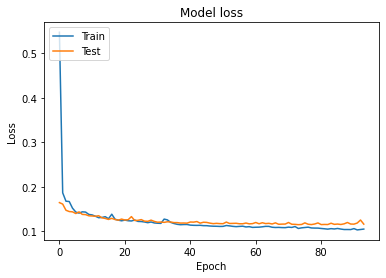

In [7]:
# 预测第一天用药
train_deep(X_train,y_train,X_test,y_test,1, callbacks_list)

create model. feature_dim =2072, label_dim =300
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               1061376   
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 300)               153900    
                                                                 
Total params: 2,003,244
Trainable params: 2,003,244
Non-trainable params: 0
______________________________________________________________

Epoch 55/500
98/98 [==============================] - 2s 20ms/step - loss: 0.1059 - JI: 0.3411 - val_loss: 0.1194 - val_JI: 0.2937


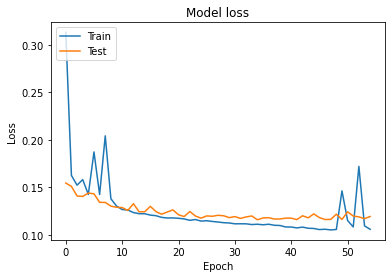

In [8]:
# 预测第一天用药
train_deep(X_train,y_train,X_test,y_test,3, callbacks_list)

In [3]:
# 预测第二天用药，第一天当做历史信息
x = df.iloc[:,5:5+72+2000+300]
y = df.iloc[:,5+72+2000+300:5+72+2000+300+300]
y

from sklearn.impute import SimpleImputer

from sklearn. preprocessing import LabelEncoder 
x['gender'] = LabelEncoder().fit_transform(x['gender'])
x['ethnicity'] = LabelEncoder().fit_transform(x['ethnicity'])
x['ethnicity_grouped'] = LabelEncoder().fit_transform(x['ethnicity_grouped'])
x['first_hosp_stay'] = LabelEncoder().fit_transform(x['first_hosp_stay'])

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

x = imp.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
from keras import backend as K
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

create model. feature_dim =2372, label_dim =300
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 512)               1214976   
                                                                 
 dense_35 (Dense)            (None, 512)               262656    
                                                                 
 dense_36 (Dense)            (None, 300)               153900    
                                                                 
Total params: 1,631,532
Trainable params: 1,631,532
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
195/195 [==============================] - 2s 11ms/step - loss: 0.3148 - JI: 0.0387 - val_loss: 0.1230 - val_JI: 0.0401
Epoch 2/500
195/195 [==============================] - 2s 10ms/step - loss: 0.1212 - JI: 0.0421 - val_loss: 0.1030 - val_JI: 0.0

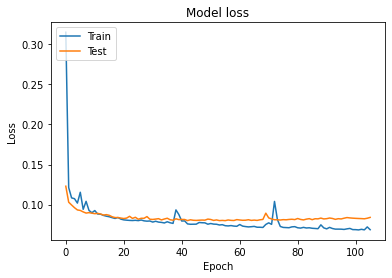

In [35]:
# 预测第二天用药，第一天用药当做历史信息，batch128
train_deep(X_train,y_train,X_test,y_test,1, callbacks_list)


create model. feature_dim =2372, label_dim =300
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               1214976   
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 300)               153900    
                                                                 
Total params: 1,631,532
Trainable params: 1,631,532
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
98/98 [==============================] - 2s 15ms/step - loss: 0.4759 - JI: 0.0348 - val_loss: 0.1149 - val_JI: 0.0255
Epoch 2/500
98/98 [==============================] - 1s 14ms/step - loss: 0.1296 - JI: 0.0430 - val_loss: 0.1223 - val_JI: 0.0658


Epoch 57/500
98/98 [==============================] - 1s 13ms/step - loss: 0.0730 - JI: 0.2278 - val_loss: 0.0814 - val_JI: 0.1738
Epoch 58/500
98/98 [==============================] - 1s 13ms/step - loss: 0.0724 - JI: 0.2317 - val_loss: 0.0821 - val_JI: 0.1743
Epoch 59/500
98/98 [==============================] - 1s 13ms/step - loss: 0.0726 - JI: 0.2297 - val_loss: 0.0808 - val_JI: 0.1927
Epoch 60/500
98/98 [==============================] - 1s 13ms/step - loss: 0.0721 - JI: 0.2349 - val_loss: 0.0835 - val_JI: 0.1625
Epoch 61/500
98/98 [==============================] - 1s 13ms/step - loss: 0.0724 - JI: 0.2331 - val_loss: 0.0817 - val_JI: 0.1851
Epoch 62/500
98/98 [==============================] - 1s 13ms/step - loss: 0.0725 - JI: 0.2327 - val_loss: 0.0823 - val_JI: 0.1849
Epoch 63/500
98/98 [==============================] - 1s 13ms/step - loss: 0.0738 - JI: 0.2289 - val_loss: 0.0832 - val_JI: 0.1617
Epoch 64/500
98/98 [==============================] - 1s 13ms/step - loss: 0.0891 -

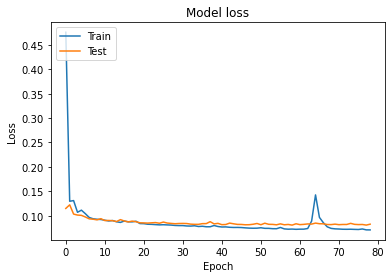

In [14]:
# 预测第二天用药，第一天用药当做历史信息
train_deep(X_train,y_train,X_test,y_test,1, callbacks_list)

create model. feature_dim =2372, label_dim =300
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               1214976   
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dense_15 (Dense)            (None, 300)               153900    
                                                                 
Total params: 2,156,844
Trainable params: 2,156,844
Non-trainable params: 0
______________________________________________________________

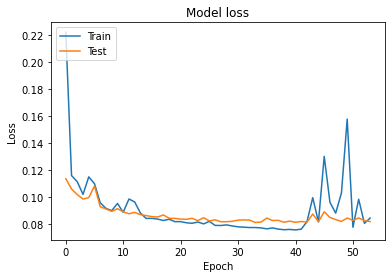

In [15]:
train_deep(X_train,y_train,X_test,y_test,3, callbacks_list)

create model. feature_dim =2372, label_dim =300
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               1214976   
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 dense_18 (Dense)            (None, 512)               262656    
                                                                 
 dense_19 (Dense)            (None, 512)               262656    
                                                                 
 dense_20 (Dense)            (None, 300)               153900    
                                                                 
Total params: 2,156,844
Trainable params: 2,156,844
Non-trainable params: 0
______________________________________________________________

Epoch 55/500
98/98 [==============================] - 2s 18ms/step - loss: 0.1291 - JI: 0.1791 - val_loss: 0.0809 - val_JI: 0.1707
Epoch 56/500
98/98 [==============================] - 2s 18ms/step - loss: 0.1361 - JI: 0.1921 - val_loss: 0.0825 - val_JI: 0.1678
Epoch 57/500
98/98 [==============================] - 2s 18ms/step - loss: 0.0942 - JI: 0.1931 - val_loss: 0.0822 - val_JI: 0.1595
Epoch 58/500
98/98 [==============================] - 2s 18ms/step - loss: 0.0913 - JI: 0.1896 - val_loss: 0.0825 - val_JI: 0.1603
Epoch 59/500
98/98 [==============================] - 2s 18ms/step - loss: 0.0777 - JI: 0.1959 - val_loss: 0.0816 - val_JI: 0.1673
Epoch 60/500
98/98 [==============================] - 2s 18ms/step - loss: 0.1297 - JI: 0.2033 - val_loss: 0.0833 - val_JI: 0.1618
Epoch 61/500
98/98 [==============================] - 2s 18ms/step - loss: 0.0956 - JI: 0.1947 - val_loss: 0.0862 - val_JI: 0.1295
Epoch 62/500
98/98 [==============================] - 2s 18ms/step - loss: 0.0915 -

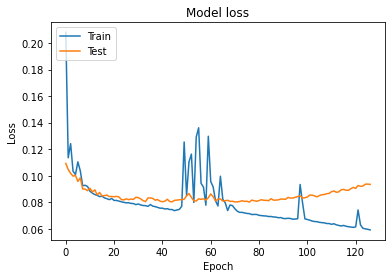

In [16]:
# 预测第二天用药，第一天用药当做历史信息
callbacks_list = [
    # This callback will interrupt training when we have stopped improving
     keras.callbacks.EarlyStopping(
    # This callback will monitor the validation accuracy of the model
    monitor='val_loss',
     # Training will be interrupted when the accuracy
     # has stopped improving for *more* than 1 epochs (i.e. 2 epochs)
     patience=50,
    )]
train_deep(X_train,y_train,X_test,y_test,3, callbacks_list)

In [29]:
# 预测第一天用药，过去用药当做历史信息
list1 = list(range(5,5+72+2000))+list(range(5+72+2000+600,5+72+2000+900))
x = df.iloc[:,list1]
y = df.iloc[:,5+72+2000:5+72+2000+300]
x

from sklearn.impute import SimpleImputer

from sklearn. preprocessing import LabelEncoder 
x['gender'] = LabelEncoder().fit_transform(x['gender'])
x['ethnicity'] = LabelEncoder().fit_transform(x['ethnicity'])
x['ethnicity_grouped'] = LabelEncoder().fit_transform(x['ethnicity_grouped'])
x['first_hosp_stay'] = LabelEncoder().fit_transform(x['first_hosp_stay'])

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

x = imp.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
from keras import backend as K
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)


,heartrate_min,heartrate_max,heartrate_mean,sysbp_min,sysbp_max,sysbp_mean,diasbp_min,diasbp_max,diasbp_mean,meanbp_min,...,00064065001_history,60505251903_history,00009338901_history,51079075920_history,00338001701_history,51079000620_history,00310013039_history,00007313705_history,00172439018_history,63481062375_history
0,90.0,124.0,111.760000,110.0,201.0,177.041667,62.0,107.0,90.666667,75.000000,...,0,0,0,0,0,0,0,0,0,0
1,69.0,104.0,79.441176,77.0,146.0,109.468750,36.0,91.0,57.593750,47.000000,...,0,0,0,0,0,0,0,0,0,0
2,95.0,127.0,111.958333,113.0,149.0,127.652174,50.0,89.0,68.782609,77.333298,...,0,0,0,0,0,0,0,0,0,0
3,58.0,92.0,78.478261,88.0,132.0,114.833333,45.0,60.0,53.125000,61.000000,...,0,0,0,0,0,0,0,0,0,0
4,89.0,142.0,107.085714,95.0,165.0,124.850000,43.0,87.0,66.625000,59.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31108,76.0,97.0,85.391304,89.0,137.0,114.565217,52.0,73.0,66.782609,63.000000,...,0,0,0,0,0,0,0,0,0,0
31109,91.0,119.0,104.310345,74.0,140.0,101.242424,37.0,61.0,47.696970,52.000000,...,0,0,0,0,0,0,0,0,0,0
31110,50.0,77.0,65.529412,77.0,131.0,115.000000,43.0,97.0,63.966667,51.000000,...,0,0,0,0,0,0,0,0,0,0
31111,101.0,118.0,110.190476,93.0,126.0,106.857143,46.0,76.0,61.523810,62.000000,...,0,0,0,0,0,0,0,0,0,0


create model. feature_dim =2372, label_dim =300
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 512)               1214976   
                                                                 
 dense_22 (Dense)            (None, 512)               262656    
                                                                 
 dense_23 (Dense)            (None, 512)               262656    
                                                                 
 dense_24 (Dense)            (None, 512)               262656    
                                                                 
 dense_25 (Dense)            (None, 300)               153900    
                                                                 
Total params: 2,156,844
Trainable params: 2,156,844
Non-trainable params: 0
______________________________________________________________

Epoch 55/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0999 - JI: 0.3676 - val_loss: 0.1186 - val_JI: 0.3025
Epoch 56/500
98/98 [==============================] - 2s 21ms/step - loss: 0.1004 - JI: 0.3656 - val_loss: 0.1190 - val_JI: 0.3002
Epoch 57/500
98/98 [==============================] - 2s 20ms/step - loss: 0.0989 - JI: 0.3726 - val_loss: 0.1175 - val_JI: 0.3007
Epoch 58/500
98/98 [==============================] - 2s 20ms/step - loss: 0.1003 - JI: 0.3655 - val_loss: 0.1193 - val_JI: 0.2987
Epoch 59/500
98/98 [==============================] - 2s 19ms/step - loss: 0.0984 - JI: 0.3738 - val_loss: 0.1276 - val_JI: 0.2807
Epoch 60/500
98/98 [==============================] - 2s 20ms/step - loss: 0.0985 - JI: 0.3741 - val_loss: 0.1206 - val_JI: 0.2998
Epoch 61/500
98/98 [==============================] - 2s 19ms/step - loss: 0.0980 - JI: 0.3768 - val_loss: 0.1225 - val_JI: 0.2837
Epoch 62/500
98/98 [==============================] - 2s 20ms/step - loss: 0.0972 -

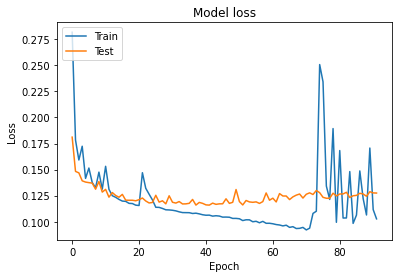

In [30]:
# 预测第一天用药，过去用药当做历史信息
callbacks_list = [
    # This callback will interrupt training when we have stopped improving
     keras.callbacks.EarlyStopping(
    # This callback will monitor the validation accuracy of the model
    monitor='val_loss',
     # Training will be interrupted when the accuracy
     # has stopped improving for *more* than 1 epochs (i.e. 2 epochs)
     patience=50,
    )]
train_deep(X_train,y_train,X_test,y_test,3, callbacks_list)

In [31]:
from keras import backend as K
from keras import losses
import numpy as np
import tensorflow as tf
from keras import losses
def JI(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
#     K.print_tensor(y_true, message='y_true = ')

    threshold_value = 0.3

    y_pred = K.cast(K.greater(y_pred, threshold_value), K.floatx())
#     K.print_tensor(y_pred, message='y_pred = ')
    fenzi = K.sum(y_true * y_pred, keepdims=True)
    # true_positives_sum = K.sum(true_positives, keepdims=True)
    fenmu = K.sum(K.cast((K.greater(y_true + y_pred, 0.8)), K.floatx()), keepdims=True)

    return K.mean(fenzi / fenmu, axis=-1)



def deep_model(feature_dim,label_dim, layer_num=1):
    from keras.models import Sequential
    from keras.layers import Dense
    model = Sequential()
    print("create model. feature_dim ={}, label_dim ={}".format(feature_dim, label_dim))
    model.add(Dense(512, activation='relu', input_dim=feature_dim))
    
    for i in range(layer_num):
        model.add(Dense(512, activation='relu'))
    model.add(Dense(label_dim, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[JI])
    return model

import keras
callbacks_list = [
    # This callback will interrupt training when we have stopped improving
     keras.callbacks.EarlyStopping(
    # This callback will monitor the validation accuracy of the model
    monitor='val_loss',
     # Training will be interrupted when the accuracy
     # has stopped improving for *more* than 1 epochs (i.e. 2 epochs)
     patience=20,
    )
#     keras.callbacks.ReduceLROnPlateau(
#      # This callback will monitor the validation loss of the model
#      monitor='val_loss',
#      # It will divide the learning by 10 when it gets triggered
#      factor=0.1,
#      # It will get triggered after the validation loss has stopped improving
#      # for at least 10 epochs
#      patience=10,
#     ),
    # This callback will save the current weights after every epoch
#     keras.callbacks.ModelCheckpoint(
#      filepath=r'C:\Users\pinkpigma\pinkpigma的同步盘\KDD研二上\jupyter\model\my_model.h5', # Path to the destination model file
#      # The two arguments below mean that we will not overwrite the
#     # model file unless `val_loss` has improved, which
#     # allows us to keep the best model every seen during training.
#     monitor='val_loss',
#     save_best_only=True,
#     )
]

import matplotlib.pyplot as plt
def train_deep(X_train,y_train,X_test,y_test, layer_num=1, callbacks_list = []):
    feature_dim = X_train.shape[1]
    label_dim = y_train.shape[1]
    model = deep_model(feature_dim,label_dim, layer_num)
    model.summary()
    history = model.fit(X_train,y_train,batch_size=128, epochs=500,callbacks=callbacks_list,validation_data=(X_test,y_test), verbose=1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

create model. feature_dim =2372, label_dim =300
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 512)               1214976   
                                                                 
 dense_27 (Dense)            (None, 512)               262656    
                                                                 
 dense_28 (Dense)            (None, 512)               262656    
                                                                 
 dense_29 (Dense)            (None, 512)               262656    
                                                                 
 dense_30 (Dense)            (None, 300)               153900    
                                                                 
Total params: 2,156,844
Trainable params: 2,156,844
Non-trainable params: 0
______________________________________________________________

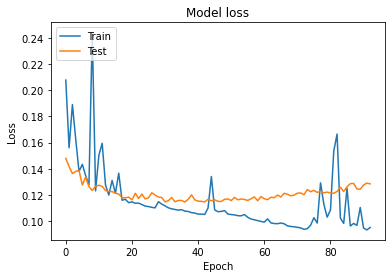

In [32]:
callbacks_list = [
    # This callback will interrupt training when we have stopped improving
     keras.callbacks.EarlyStopping(
    # This callback will monitor the validation accuracy of the model
    monitor='val_loss',
     # Training will be interrupted when the accuracy
     # has stopped improving for *more* than 1 epochs (i.e. 2 epochs)
     patience=50,
    )]
train_deep(X_train,y_train,X_test,y_test,3, callbacks_list)

In [10]:
from keras import backend as K
from keras import losses
import numpy as np
import tensorflow as tf
from keras import losses
def JI(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
#     K.print_tensor(y_true, message='y_true = ')

    threshold_value = 0.3

    y_pred = K.cast(K.greater(y_pred, threshold_value), K.floatx())
#     K.print_tensor(y_pred, message='y_pred = ')
    fenzi = K.sum(y_true * y_pred, keepdims=True)
    # true_positives_sum = K.sum(true_positives, keepdims=True)
    fenmu = K.sum(K.cast((K.greater(y_true + y_pred, 0.8)), K.floatx()), keepdims=True)

    return K.mean(fenzi / fenmu, axis=-1)


import keras

# 加入L2正则化
def deep_model(feature_dim,label_dim, layer_num=1):
    from keras.models import Sequential
    from keras.layers import Dense
    model = Sequential()
    print("create model. feature_dim ={}, label_dim ={}".format(feature_dim, label_dim))
    model.add(Dense(512, activation='relu', input_dim=feature_dim))
    
    for i in range(layer_num):
        model.add(Dense(512, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
    model.add(Dense(label_dim, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[JI])
    return model


callbacks_list = [
    # This callback will interrupt training when we have stopped improving
     keras.callbacks.EarlyStopping(
    # This callback will monitor the validation accuracy of the model
    monitor='val_loss',
     # Training will be interrupted when the accuracy
     # has stopped improving for *more* than 1 epochs (i.e. 2 epochs)
     patience=20,
    )
#     keras.callbacks.ReduceLROnPlateau(
#      # This callback will monitor the validation loss of the model
#      monitor='val_loss',
#      # It will divide the learning by 10 when it gets triggered
#      factor=0.1,
#      # It will get triggered after the validation loss has stopped improving
#      # for at least 10 epochs
#      patience=10,
#     ),
    # This callback will save the current weights after every epoch
#     keras.callbacks.ModelCheckpoint(
#      filepath=r'C:\Users\pinkpigma\pinkpigma的同步盘\KDD研二上\jupyter\model\my_model.h5', # Path to the destination model file
#      # The two arguments below mean that we will not overwrite the
#     # model file unless `val_loss` has improved, which
#     # allows us to keep the best model every seen during training.
#     monitor='val_loss',
#     save_best_only=True,
#     )
]

import matplotlib.pyplot as plt
def train_deep(X_train,y_train,X_test,y_test, layer_num=1, callbacks_list = []):
    feature_dim = X_train.shape[1]
    label_dim = y_train.shape[1]
    model = deep_model(feature_dim,label_dim, layer_num)
    model.summary()
    history = model.fit(X_train,y_train,batch_size=256, epochs=500,callbacks=callbacks_list,validation_data=(X_test,y_test), verbose=1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()





create model. feature_dim =2372, label_dim =300
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               1214976   
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 300)               153900    
                                                                 
Total params: 2,156,844
Trainable params: 2,156,844
Non-trainable params: 0
______________________________________________________________

98/98 [==============================] - 2s 22ms/step - loss: 0.1002 - JI: 0.0647 - val_loss: 0.1004 - val_JI: 0.0696
Epoch 54/500
98/98 [==============================] - 2s 22ms/step - loss: 0.1000 - JI: 0.0665 - val_loss: 0.1005 - val_JI: 0.0599
Epoch 55/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0999 - JI: 0.0662 - val_loss: 0.1014 - val_JI: 0.0668
Epoch 56/500
98/98 [==============================] - 2s 21ms/step - loss: 0.1000 - JI: 0.0661 - val_loss: 0.1003 - val_JI: 0.0616
Epoch 57/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0999 - JI: 0.0667 - val_loss: 0.1005 - val_JI: 0.0716
Epoch 58/500
98/98 [==============================] - 2s 22ms/step - loss: 0.0998 - JI: 0.0677 - val_loss: 0.1002 - val_JI: 0.0624
Epoch 59/500
98/98 [==============================] - 2s 22ms/step - loss: 0.0998 - JI: 0.0677 - val_loss: 0.1001 - val_JI: 0.0654
Epoch 60/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0998 - JI: 0.0675 -

98/98 [==============================] - 2s 21ms/step - loss: 0.0983 - JI: 0.0753 - val_loss: 0.0988 - val_JI: 0.0743
Epoch 116/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0983 - JI: 0.0750 - val_loss: 0.0988 - val_JI: 0.0780
Epoch 117/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0984 - JI: 0.0752 - val_loss: 0.0988 - val_JI: 0.0757
Epoch 118/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0983 - JI: 0.0753 - val_loss: 0.0988 - val_JI: 0.0721
Epoch 119/500
98/98 [==============================] - 2s 22ms/step - loss: 0.0983 - JI: 0.0762 - val_loss: 0.0991 - val_JI: 0.0653
Epoch 120/500
98/98 [==============================] - 2s 20ms/step - loss: 0.0983 - JI: 0.0759 - val_loss: 0.0989 - val_JI: 0.0746
Epoch 121/500
98/98 [==============================] - 2s 22ms/step - loss: 0.0983 - JI: 0.0756 - val_loss: 0.0987 - val_JI: 0.0711
Epoch 122/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0989 - JI: 0

98/98 [==============================] - 2s 21ms/step - loss: 0.0959 - JI: 0.0854 - val_loss: 0.0966 - val_JI: 0.0816
Epoch 178/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0960 - JI: 0.0845 - val_loss: 0.0967 - val_JI: 0.0744
Epoch 179/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0959 - JI: 0.0846 - val_loss: 0.0967 - val_JI: 0.0808
Epoch 180/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0958 - JI: 0.0849 - val_loss: 0.0965 - val_JI: 0.0776
Epoch 181/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0957 - JI: 0.0851 - val_loss: 0.0969 - val_JI: 0.0809
Epoch 182/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0959 - JI: 0.0841 - val_loss: 0.0966 - val_JI: 0.0789
Epoch 183/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0958 - JI: 0.0833 - val_loss: 0.0967 - val_JI: 0.0830
Epoch 184/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0958 - JI: 0

98/98 [==============================] - 2s 22ms/step - loss: 0.0945 - JI: 0.0800 - val_loss: 0.0955 - val_JI: 0.0746
Epoch 240/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0944 - JI: 0.0800 - val_loss: 0.0953 - val_JI: 0.0774
Epoch 241/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0945 - JI: 0.0793 - val_loss: 0.0954 - val_JI: 0.0764
Epoch 242/500
98/98 [==============================] - 2s 20ms/step - loss: 0.0945 - JI: 0.0798 - val_loss: 0.0955 - val_JI: 0.0787
Epoch 243/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0945 - JI: 0.0810 - val_loss: 0.0953 - val_JI: 0.0751
Epoch 244/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0945 - JI: 0.0798 - val_loss: 0.0954 - val_JI: 0.0714
Epoch 245/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0947 - JI: 0.0787 - val_loss: 0.0953 - val_JI: 0.0756
Epoch 246/500
98/98 [==============================] - 2s 22ms/step - loss: 0.0955 - JI: 0

98/98 [==============================] - 2s 22ms/step - loss: 0.0937 - JI: 0.0794 - val_loss: 0.0949 - val_JI: 0.0740
Epoch 302/500
98/98 [==============================] - 2s 22ms/step - loss: 0.0937 - JI: 0.0788 - val_loss: 0.0948 - val_JI: 0.0735
Epoch 303/500
98/98 [==============================] - 2s 22ms/step - loss: 0.0937 - JI: 0.0798 - val_loss: 0.0947 - val_JI: 0.0729
Epoch 304/500
98/98 [==============================] - 2s 22ms/step - loss: 0.0936 - JI: 0.0788 - val_loss: 0.0947 - val_JI: 0.0767
Epoch 305/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0937 - JI: 0.0796 - val_loss: 0.0948 - val_JI: 0.0727
Epoch 306/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0937 - JI: 0.0789 - val_loss: 0.0949 - val_JI: 0.0688
Epoch 307/500
98/98 [==============================] - 2s 22ms/step - loss: 0.0937 - JI: 0.0788 - val_loss: 0.0947 - val_JI: 0.0727
Epoch 308/500
98/98 [==============================] - 2s 22ms/step - loss: 0.0937 - JI: 0

98/98 [==============================] - 2s 21ms/step - loss: 0.0936 - JI: 0.0783 - val_loss: 0.0953 - val_JI: 0.0719
Epoch 364/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0936 - JI: 0.0776 - val_loss: 0.0948 - val_JI: 0.0746
Epoch 365/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0933 - JI: 0.0788 - val_loss: 0.0944 - val_JI: 0.0746
Epoch 366/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0933 - JI: 0.0785 - val_loss: 0.0945 - val_JI: 0.0737
Epoch 367/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0932 - JI: 0.0789 - val_loss: 0.0944 - val_JI: 0.0753
Epoch 368/500
98/98 [==============================] - 2s 22ms/step - loss: 0.0932 - JI: 0.0794 - val_loss: 0.0945 - val_JI: 0.0820
Epoch 369/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0933 - JI: 0.0799 - val_loss: 0.0943 - val_JI: 0.0692
Epoch 370/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0932 - JI: 0

98/98 [==============================] - 2s 21ms/step - loss: 0.0927 - JI: 0.0807 - val_loss: 0.0941 - val_JI: 0.0757
Epoch 426/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0927 - JI: 0.0812 - val_loss: 0.0940 - val_JI: 0.0797
Epoch 427/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0927 - JI: 0.0821 - val_loss: 0.0941 - val_JI: 0.0752
Epoch 428/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0928 - JI: 0.0808 - val_loss: 0.0941 - val_JI: 0.0748
Epoch 429/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0927 - JI: 0.0810 - val_loss: 0.0939 - val_JI: 0.0719
Epoch 430/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0927 - JI: 0.0805 - val_loss: 0.0939 - val_JI: 0.0791
Epoch 431/500
98/98 [==============================] - 2s 22ms/step - loss: 0.0926 - JI: 0.0824 - val_loss: 0.0941 - val_JI: 0.0724
Epoch 432/500
98/98 [==============================] - 2s 21ms/step - loss: 0.0926 - JI: 0

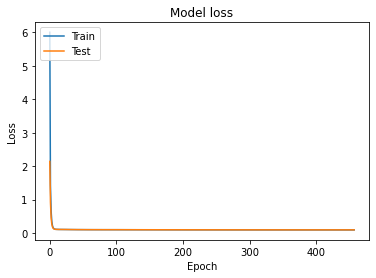

In [11]:
#预测第二天用药，第一天当做历史信息，加了L2

callbacks_list = [
    # This callback will interrupt training when we have stopped improving
     keras.callbacks.EarlyStopping(
    # This callback will monitor the validation accuracy of the model
    monitor='val_loss',
     # Training will be interrupted when the accuracy
     # has stopped improving for *more* than 1 epochs (i.e. 2 epochs)
     patience=50,
    )]
train_deep(X_train,y_train,X_test,y_test,3, callbacks_list)